In [1]:
import random
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

In [2]:
sigma_u = 1
vp_1 = 2
vp_2 = 3
sigma_p_1 = 1
sigma_p_2 = 1
dt = 0.01

PHI_1s = []

In [3]:
v_1 = [random.randint(1, 5) for i in range(1000)]
v_2 = [random.randint(1, 5) for i in range(1000)]

In [4]:
phi_1 = list(range(2000))
phi_1[0] = vp_1
phi_2 = list(range(2000))
phi_2[0] = vp_2
ep_1 = list(range(2000))
ep_1[0] = 0
ep_2 = list(range(2000))
ep_2[0] = 0
eu = list(range(2000))
eu[0] = 0

u = v_1[0] + v_2[0]
for j in range(1, 1000):
        phi_1[j] = max(phi_1[j-1] + dt * (-ep_1[j-1] + eu[j-1] * (1 + phi_2[j-1])), 0)
        phi_2[j] = max(phi_2[j-1] + dt * (-ep_2[j-1] + eu[j-1] * (1 + phi_1[j-1])), 0)
        ep_1[j] = ep_1[j-1] + dt * (phi_1[j-1] - vp_1 - sigma_p_1 * ep_1[j-1])
        ep_2[j] = ep_2[j-1] + dt * (phi_2[j-1] - vp_2 - sigma_p_2 * ep_2[j-1])
        eu[j] = eu[j-1] + dt * (u - phi_1[j-1] - phi_2[j-1] - sigma_u * eu[j-1])
        
plt.scatter(range(1000), phi_1)
plt.xlabel("epoch")
plt.ylabel("φ")
plt.plot()
plt.grid()
plt.show()

print("u:", u)
print("v_1:", v_1[0])
print("v_2:", v_2[0])

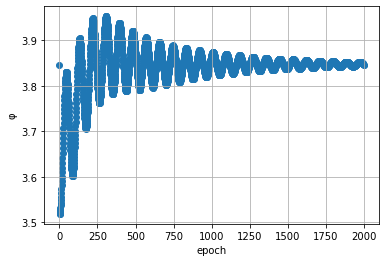

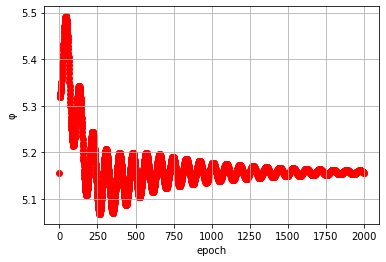

u: 20
v_1: 4
v_2: 5
phi_1: 3.8462161795882097
phi_2: 5.1562231712290965
sigma_p_1: 2.135130226629437
sigma_p_2: 1.1392713393997047
sigma_u: 1


In [5]:
for i in range(1, 1000):
    u = v_1[i] * v_2[i]
    # 推測
    for j in range(1, 2000):
        phi_1[j] = phi_1[j-1] + dt * (-ep_1[j-1] + eu[j-1] * (1 + phi_2[j-1]))
        phi_2[j] = phi_2[j-1] + dt * (-ep_2[j-1] + eu[j-1] * (1 + phi_1[j-1]))
#         phi_1[j] = max(phi_1[j-1] + dt * (-ep_1[j-1] + eu[j-1] * phi_2[j-1]), 0)
#         phi_2[j] = max(phi_2[j-1] + dt * (-ep_2[j-1] + eu[j-1] * phi_1[j-1]), 0)
        ep_1[j] = ep_1[j-1] + dt * (phi_1[j-1] - vp_1 - sigma_p_1 * ep_1[j-1])
        ep_2[j] = ep_2[j-1] + dt * (phi_2[j-1] - vp_2 - sigma_p_2 * ep_2[j-1])
        eu[j] = eu[j-1] + dt * (u - phi_1[j-1] * phi_2[j-1] - sigma_u * eu[j-1])
        
#     plt.scatter(range(1000), phi_1)
#     plt.xlabel("epoch")
#     plt.ylabel("φ")
#     plt.plot()
#     plt.grid()
#     plt.show()

    phi_1[0] = phi_1[-1]
    phi_2[0] = phi_2[-1]
    ep_1[0] = ep_1[-1]
    ep_2[0] = ep_2[-1]
    eu[0] = eu[-1]

    # 学習
    vp_1 = vp_1 + ep_1[-1] * dt
    vp_2 = vp_2 + ep_2[-1] * dt
    sigma_p_1 = max(sigma_p_1 + 1/2 * (ep_1[-1]**2 - 1/sigma_p_1), 1)
    sigma_p_2 = max(sigma_p_2 + 1/2 * (ep_2[-1]**2 - 1/sigma_p_2), 1)
    sigma_u = max(sigma_u + 1/2 * (eu[-1]**2 - 1/sigma_u), 1) 
    
#     print(i, "回目")
#     print("u:", u)
#     print("v_1:", v_1[i])
#     print("v_2:", v_2[i])
#     print("phi_1:", phi_1[-1])
#     print("phi_2:", phi_2[-1])
#     print("sigma_p_1:", sigma_p_1)
#     print("sigma_p_2:", sigma_p_2)
#     print("sigma_u:" , sigma_u)
plt.scatter(range(2000), phi_1)
plt.xlabel("epoch")
plt.ylabel("φ")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(2000), phi_2, color='r')
plt.xlabel("epoch")
plt.ylabel("φ")
plt.plot()
plt.grid()
plt.show()
    
print("u:", u)
print("v_1:", v_1[-1])
print("v_2:", v_2[-1])
print("phi_1:", phi_1[-1])
print("phi_2:", phi_2[-1])
print("sigma_p_1:", sigma_p_1)
print("sigma_p_2:", sigma_p_2)
print("sigma_u:" , sigma_u)